In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz
import re

In [2]:
## function to extract date for the linkedin activity

def getDate(text):
    a= re.findall(r"\D(\d{19})\D", text)
    a= re.findall(r"\d{19}", text)
    a = int(''.join(a))
    a = format(a, 'b')
    first41chars = a[:41]
    ts = int(first41chars,2)
    actual_time = datetime.utcfromtimestamp(ts/1000).strftime("%Y-%m-%d %H:%M:%S %Z")
    tz = pytz.timezone('Europe/Paris')
    localtime = datetime.fromtimestamp(ts/1000, tz).strftime("%Y-%m-%d %H:%M:%S %Z")
    return localtime


In [35]:
# read the csv data
filepath = '/Users/sundarsitaula/Downloads/result (7).csv'
df = pd.read_csv(filepath)
df = df[df['action'] != 'Post']

In [4]:
## mapper dicts and function to rename reactions


mapper_1 = {'liked':'liked a comment on their own post', 'likes': 'liked post',
            'commented': 'commented', 'replied': 'replied to a comment'}

mapper_2 = {"liked post": "likes and reactions",  "celebrates" : "likes and reactions",
           "loves" : "likes and reactions",  "finds insightful" : "likes and reactions", 
           'curios': "likes and reactions", 'supports': "likes and reactions", 'reposted' : 'reposted'}

mapper_3 = {"likes and reactions" : "Outreach",
            "liked a comment on their own post" : "Community Management",
            "commented" : "Outreach",
            "replied to a comment": "Community Management",
            'reposted': 'Outreach' }


def rename_reactions(reactions):
    if 'liked' in reactions:
        return mapper_1['liked']
    elif 'likes' in reactions:
        return mapper_1['likes']
    elif 'commented' in reactions:
        return 'commented'
    elif 'replied'in reactions:
        return mapper_1['replied']
    elif 'celebrates' in reactions:
        return 'celebrates'
    elif 'supports' in reactions:
        return 'supports'
    elif 'insightful' in reactions:
        return 'finds insightful'
    elif 'curious' in reactions:
        return 'curios'
    elif 'loves' in reactions:
        return 'loves'
    elif 'reposted' in reactions:
        return 'reposted'


    else:
        return reactions

In [36]:
df['Activity'] = df.action.apply(rename_reactions)
df['Activity'] = df.Activity.apply(lambda x : mapper_2[x] if x in mapper_2.keys() else x)
df["Outreach_type"] = df.Activity.apply(lambda x : mapper_3[x])
df['posting_date'] = df.postUrl.apply(getDate)
df['month'] = pd.to_datetime(df.posting_date).dt.month_name()
df['year'] = pd.to_datetime(df.posting_date).dt.year

In [37]:
df.tail()

,postUrl,action,imgUrl,type,postContent,likeCount,commentCount,postDate,viewCount,profileUrl,timestamp,sharedPostUrl,repostCount,videoUrl,sharedJobUrl,Activity,Outreach_type,posting_date,month,year
295,https://www.linkedin.com/feed/update/urn:li:ac...,Robin Laik likes this,https://media.licdn.com/dms/image/C4E22AQEDwyp...,Image,Unser #primepulse CEO & Co-Founder Klaus Weinm...,72,0,1yr,NaN,https://www.linkedin.com/in/robin-laik-34b7a1102/,2023-01-05T11:18:06.415Z,NaN,NaN,NaN,NaN,likes and reactions,Outreach,2022-01-12 16:10:34 CET,January,2022
296,https://www.linkedin.com/feed/update/urn:li:ac...,Robin Laik likes this,https://media.licdn.com/dms/image/C4E22AQEtLzq...,Image,Donges SteelTec impft!Gestern konnten sich Mit...,41,1,1yr,NaN,https://www.linkedin.com/in/robin-laik-34b7a1102/,2023-01-05T11:18:06.415Z,NaN,NaN,NaN,NaN,likes and reactions,Outreach,2022-01-12 15:15:32 CET,January,2022
297,https://www.linkedin.com/feed/update/urn:li:ac...,Robin Laik likes this,https://media.licdn.com/dms/image/sync/C4D27AQ...,Article,💭Zum Jahresauftakt war unser CIO Johannes Laum...,65,0,1yr,NaN,https://www.linkedin.com/in/robin-laik-34b7a1102/,2023-01-05T11:18:06.416Z,https://www.deraktionaer.de/artikel/aktien/mut...,NaN,NaN,NaN,likes and reactions,Outreach,2022-01-12 12:49:01 CET,January,2022
298,https://www.linkedin.com/feed/update/urn:li:ac...,Robin Laik likes this,NaN,Text,"I wish all our people, shareholders and stakeh...",146,1,1yr,NaN,https://www.linkedin.com/in/robin-laik-34b7a1102/,2023-01-05T11:18:06.416Z,NaN,NaN,NaN,NaN,likes and reactions,Outreach,2022-01-10 13:47:54 CET,January,2022
299,https://www.linkedin.com/feed/update/urn:li:ac...,Robin Laik likes this,https://media.licdn.com/dms/image/C5622AQF6SnW...,Image,CLECIM PORTRAIT N°6: Let’s meet our people We ...,59,9,1yr,NaN,https://www.linkedin.com/in/robin-laik-34b7a1102/,2023-01-05T11:18:06.416Z,NaN,3.0,NaN,NaN,likes and reactions,Outreach,2022-01-09 10:16:20 CET,January,2022


In [38]:
df = df[['Activity', 'Outreach_type']]

In [39]:
df.Outreach_type.value_counts()

Outreach                299
Community Management      1
Name: Outreach_type, dtype: int64

In [40]:
df.head()

,Activity,Outreach_type
0,likes and reactions,Outreach
1,likes and reactions,Outreach
2,likes and reactions,Outreach
3,likes and reactions,Outreach
4,likes and reactions,Outreach


In [43]:
sdf = df.groupby('Outreach_type')['Activity'].value_counts().unstack(level=0).reset_index()
sdf = sdf.melt(id_vars=[ 'Activity'], var_name="Outreach_type", value_name = "Counts").fillna(0)
sdf = sdf[sdf.Counts>0]

In [44]:
sdf.head()

,Activity,Outreach_type,Counts
0,liked a comment on their own post,Community Management,1.0
3,likes and reactions,Outreach,299.0


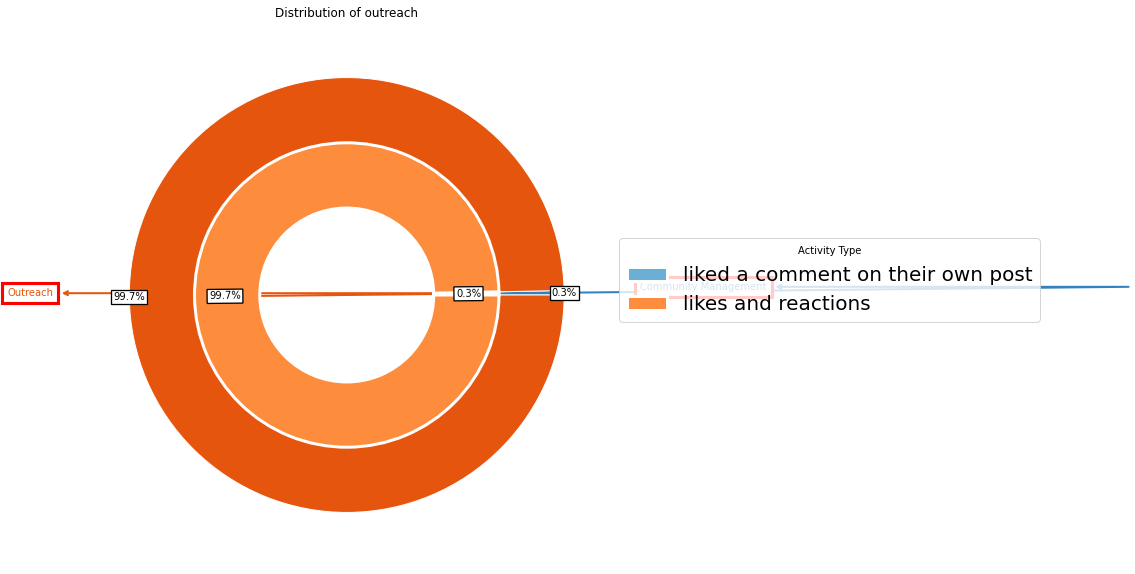

In [46]:
from cProfile import label
from enum import auto
from turtle import color, title, width


fig, ax = plt.subplots(figsize = (10,10))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5, 8, 12, 15, 19]))

wedges,texts, autopcts = ax.pie(sdf.groupby('Outreach_type', sort=False)["Counts"].sum(), radius=1, colors=outer_colors,  autopct='%1.1f%%', pctdistance=1.0,
       wedgeprops=dict(width=size, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=1.3)
for autopct in autopcts:
    autopct.set_color('black')
    autopct.set_bbox(bbox_props)


bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="r", lw=3.1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="bottom")

for i, text in enumerate(texts):
    text.set_color(outer_colors[i])
    text.set_fontsize(15)


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1 
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle, 'arrowstyle':'<-', 'linewidth': 2}, color= outer_colors[i])
    ax.annotate(sdf.Outreach_type.value_counts().index.tolist()[i], color= outer_colors[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)



# ############################################################
# # inner pie chart
# ############################################################

wedges, texts, autopcts = ax.pie(sdf['Counts'], radius=1-size, colors=inner_colors,  labels=sdf.Activity, autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='white'), rotatelabels=True, pctdistance=0.8)

bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=1.3)
for autopct, label in zip(autopcts, texts):
    autopct.set_color('black')
    autopct.set_rotation(label.get_rotation())
    autopct.set_bbox(bbox_props)
    

for txt in texts:
    txt.set_alpha(0)

for wedge in wedges:
    wedge.set_linewidth(3)
   


bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="r", lw=0.1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="bottom")


# # for i, p in enumerate(wedges):
# #     ang = (p.theta2 - p.theta1)/2. + p.theta1 
# #     y = np.sin(np.deg2rad(ang))
# #     x = np.cos(np.deg2rad(ang))
# #     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
# #     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
# #     kw["arrowprops"].update({"connectionstyle": connectionstyle, 'arrowstyle':'->'}, color = inner_colors[i])
# #     ax.annotate(ssdf.Activity.tolist()[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
# #                 horizontalalignment=horizontalalignment, **kw)


ax.legend( title="Activity Type",loc=(1, 0.45) , fontsize = 20)
ax.set(aspect="equal", title='Distribution of outreach')
# #plt.savefig('krebber_outreach.svg', bbox_inches = 'tight')
plt.show() 

In [41]:
import plotly.express as px
import numpy as np

fig = px.sunburst(sdf, path=['Outreach_type', 'Activity'], values='Counts',
                  color='Outreach_type', 
                  color_continuous_scale='RdBu')
fig.show()

/Users/sundarsitaula/opt/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/sundarsitaula/opt/anaconda3/envs/ds/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1.0
299.0


Text(0, 0.5, ' ')

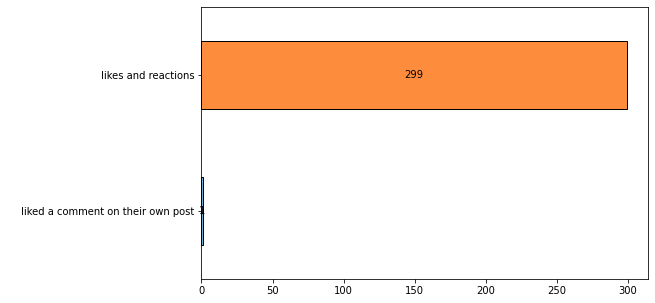

In [47]:
ax = sdf.plot(kind='barh', x='Activity', y="Counts", color=inner_colors, legend=False, ec = 'k', figsize=(8,5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    print(width)
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color = 'k')
ax.set_ylabel(' ')